# Imports

In [1]:
import cv2

# Data Manipulation
import numpy as np
import pandas as pd
import glob

# Graphics
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mpimg

# Aesthetics
pd.set_option("max_colwidth", 200)

mpl.rcParams['figure.figsize'] = (10.0, 10.0) 
                              ###(  → ,  ↑  ) ###
mpl.rcParams['font.size'] = 24

# Get paths of all images

## images were obtained from https://www.kaggle.com/sinamhd9/rsnamiccai-jpg-images

In [2]:
paths = []
for filename in glob.glob("/Users/victor/Desktop/deep_learning/project/brain_data/train/*.jpg"):
    paths.append(filename)

In [3]:
paths[59]

'/Users/victor/Desktop/deep_learning/project/brain_data/train/00243-T1wImage-13.jpg'

# From path strip all relevant information

In [4]:
%%time
has_image = []
patient_id = []
modality = []
image_id = []

for path in paths:
    img = cv2.imread(path)
    if np.sum(img) > 0:
        has_image.append(1)
    else:
        has_image.append(0)  
        
    a,b,c = path.split("-")
    patient_id.append(a[-5:])
    modality.append(b.replace("Image",""))
    d,e = c.split(".")
    image_id.append(d)

CPU times: user 2min 8s, sys: 33.4 s, total: 2min 42s
Wall time: 4min 17s


In [5]:
df = pd.DataFrame()
df["path"] = paths

df["has_image"] = has_image
df["patient"] = patient_id
df["modality"] = modality
df["image_id"] = image_id

df["train_or_test"] = "train"

In [6]:
df.head()

,path,has_image,patient,modality,image_id,train_or_test
0,/Users/victor/Desktop/deep_learning/project/brain_data/train/00087-T1wImage-14.jpg,1,00087,T1w,14,train
1,/Users/victor/Desktop/deep_learning/project/brain_data/train/00053-FLAIRImage-464.jpg,1,00053,FLAIR,464,train
2,/Users/victor/Desktop/deep_learning/project/brain_data/train/00028-T2wImage-294.jpg,1,00028,T2w,294,train
3,/Users/victor/Desktop/deep_learning/project/brain_data/train/00006-T2wImage-64.jpg,0,00006,T2w,64,train
4,/Users/victor/Desktop/deep_learning/project/brain_data/train/00478-T1wCEImage-130.jpg,1,00478,T1wCE,130,train


# Merge with planes df

In [7]:
planes = pd.read_csv("planes.csv", converters={'patient': str})

In [8]:
planes.head()

,patient,modality,image,plane
0,00688,T2w,Image-273,Sagittal
1,00688,T2w,Image-245,Sagittal
2,00688,T2w,Image-365,Sagittal
3,00688,T2w,Image-130,Sagittal
4,00688,T2w,Image-98,Sagittal


In [9]:
def get_image_id(string):
    return string.split("-")[1]

planes["image_id"] = planes.image.apply(get_image_id)
planes.head()

,patient,modality,image,plane,image_id
0,00688,T2w,Image-273,Sagittal,273
1,00688,T2w,Image-245,Sagittal,245
2,00688,T2w,Image-365,Sagittal,365
3,00688,T2w,Image-130,Sagittal,130
4,00688,T2w,Image-98,Sagittal,98


In [10]:
new_df = pd.merge(df, planes,  how='left', 
                  left_on  = ['patient', 'image_id', 'modality'], 
                  right_on = ['patient', 'image_id', 'modality'])

new_df.head()

,path,has_image,patient,modality,image_id,train_or_test,image,plane
0,/Users/victor/Desktop/deep_learning/project/brain_data/train/00087-T1wImage-14.jpg,1,00087,T1w,14,train,Image-14,Axial
1,/Users/victor/Desktop/deep_learning/project/brain_data/train/00053-FLAIRImage-464.jpg,1,00053,FLAIR,464,train,Image-464,Axial
2,/Users/victor/Desktop/deep_learning/project/brain_data/train/00028-T2wImage-294.jpg,1,00028,T2w,294,train,Image-294,Sagittal
3,/Users/victor/Desktop/deep_learning/project/brain_data/train/00006-T2wImage-64.jpg,0,00006,T2w,64,train,Image-64,Sagittal
4,/Users/victor/Desktop/deep_learning/project/brain_data/train/00478-T1wCEImage-130.jpg,1,00478,T1wCE,130,train,Image-130,Axial


In [11]:
new_df.drop(["image"], axis=1, inplace=True)

In [12]:
new_df.head()

,path,has_image,patient,modality,image_id,train_or_test,plane
0,/Users/victor/Desktop/deep_learning/project/brain_data/train/00087-T1wImage-14.jpg,1,00087,T1w,14,train,Axial
1,/Users/victor/Desktop/deep_learning/project/brain_data/train/00053-FLAIRImage-464.jpg,1,00053,FLAIR,464,train,Axial
2,/Users/victor/Desktop/deep_learning/project/brain_data/train/00028-T2wImage-294.jpg,1,00028,T2w,294,train,Sagittal
3,/Users/victor/Desktop/deep_learning/project/brain_data/train/00006-T2wImage-64.jpg,0,00006,T2w,64,train,Sagittal
4,/Users/victor/Desktop/deep_learning/project/brain_data/train/00478-T1wCEImage-130.jpg,1,00478,T1wCE,130,train,Axial


In [13]:
df = new_df[['patient', 'modality', 'plane', 'image_id', 'has_image', 'train_or_test', 'path']].copy()

In [14]:
df.plane = df.plane.str.lower()
df.head(10)

,patient,modality,plane,image_id,has_image,train_or_test,path
0,00087,T1w,axial,14,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00087-T1wImage-14.jpg
1,00053,FLAIR,axial,464,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00053-FLAIRImage-464.jpg
2,00028,T2w,sagittal,294,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00028-T2wImage-294.jpg
3,00006,T2w,sagittal,64,0,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00006-T2wImage-64.jpg
4,00478,T1wCE,axial,130,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00478-T1wCEImage-130.jpg
5,00532,T1w,axial,24,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00532-T1wImage-24.jpg
6,00074,T2w,coronal,265,0,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00074-T2wImage-265.jpg
7,00686,T1wCE,axial,1,0,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00686-T1wCEImage-1.jpg
8,00753,T2w,sagittal,52,0,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00753-T2wImage-52.jpg
9,00312,T1wCE,axial,124,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00312-T1wCEImage-124.jpg


In [15]:
df.plane.value_counts()

axial       204682
sagittal     87308
coronal      56651
Name: plane, dtype: int64

# Merge with labels

In [16]:
labels = pd.read_csv("train_labels.csv")
labels

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1
...,...,...
580,1005,1
581,1007,1
582,1008,1
583,1009,0


In [28]:
df["patient_int"] = df.patient.astype(int)
df

,patient,modality,plane,image_id,has_image,train_or_test,path,patient_int
0,00087,T1w,axial,14,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00087-T1wImage-14.jpg,87
1,00053,FLAIR,axial,464,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00053-FLAIRImage-464.jpg,53
2,00028,T2w,sagittal,294,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00028-T2wImage-294.jpg,28
3,00006,T2w,sagittal,64,0,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00006-T2wImage-64.jpg,6
4,00478,T1wCE,axial,130,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00478-T1wCEImage-130.jpg,478
...,...,...,...,...,...,...,...,...
348636,00387,T1w,axial,83,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00387-T1wImage-83.jpg,387
348637,00674,T1wCE,axial,79,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00674-T1wCEImage-79.jpg,674
348638,00100,FLAIR,axial,10,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00100-FLAIRImage-10.jpg,100
348639,00760,T1w,axial,6,0,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00760-T1wImage-6.jpg,760


In [29]:
%%time

new_df = pd.merge(df, labels,  how='left', 
                  left_on  = ['patient_int'], 
                  right_on = ['BraTS21ID'])

new_df.head()

CPU times: user 133 ms, sys: 23.9 ms, total: 157 ms
Wall time: 162 ms


,patient,modality,plane,image_id,has_image,train_or_test,path,patient_int,BraTS21ID,MGMT_value
0,00087,T1w,axial,14,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00087-T1wImage-14.jpg,87,87,1
1,00053,FLAIR,axial,464,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00053-FLAIRImage-464.jpg,53,53,0
2,00028,T2w,sagittal,294,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00028-T2wImage-294.jpg,28,28,1
3,00006,T2w,sagittal,64,0,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00006-T2wImage-64.jpg,6,6,1
4,00478,T1wCE,axial,130,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00478-T1wCEImage-130.jpg,478,478,1


In [33]:
df = new_df.drop(["BraTS21ID", "patient_int"], axis=1)
df.rename(columns={"MGMT_value":"has_tumor"}, inplace=True)
df.head()

,patient,modality,plane,image_id,has_image,train_or_test,path,has_tumor
0,00087,T1w,axial,14,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00087-T1wImage-14.jpg,1
1,00053,FLAIR,axial,464,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00053-FLAIRImage-464.jpg,0
2,00028,T2w,sagittal,294,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00028-T2wImage-294.jpg,1
3,00006,T2w,sagittal,64,0,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00006-T2wImage-64.jpg,1
4,00478,T1wCE,axial,130,1,train,/Users/victor/Desktop/deep_learning/project/brain_data/train/00478-T1wCEImage-130.jpg,1


# Check that no patient has 2 diagnosis

In [46]:
mins = []

for patient in df.patient.unique():
    mins.append(min(len(df[(df.patient == patient) & (df.has_tumor == 0)]), len(df[(df.patient == patient) & (df.has_tumor == 1)])))
    
max(mins)

0

# Test the cleaning worked (I checked various combinations and all were correct)

In [48]:
def check_data_cleaning(plane, has_image):
    for n in range(0, 300, 60):
        tmp = df[(df.plane == plane) & (df.has_image == has_image)]
        image_path = tmp.path.iloc[n]

        img = mpimg.imread(image_path)
        imgplot = plt.imshow(img, cmap='gray')
        plt.show()

## Sagittal check

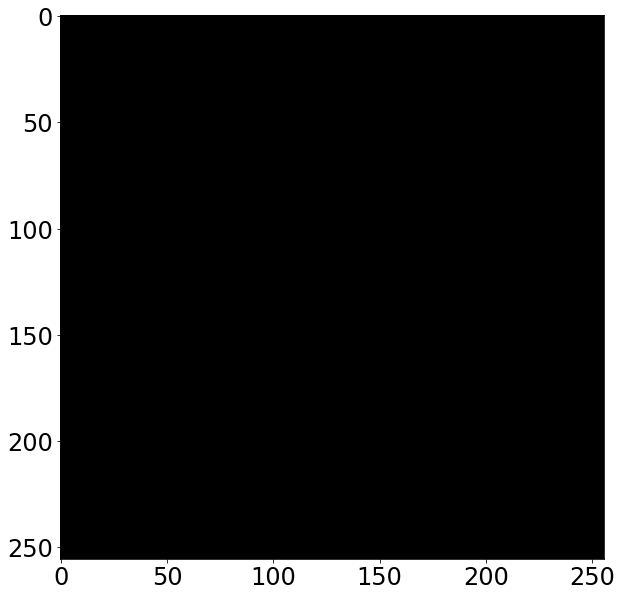

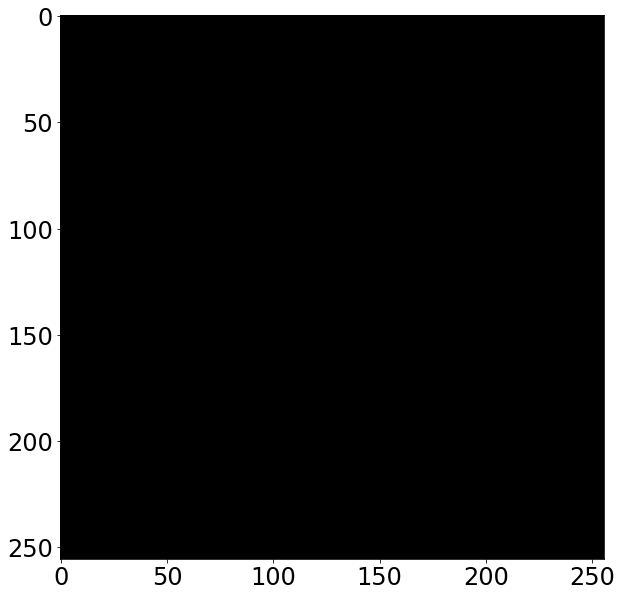

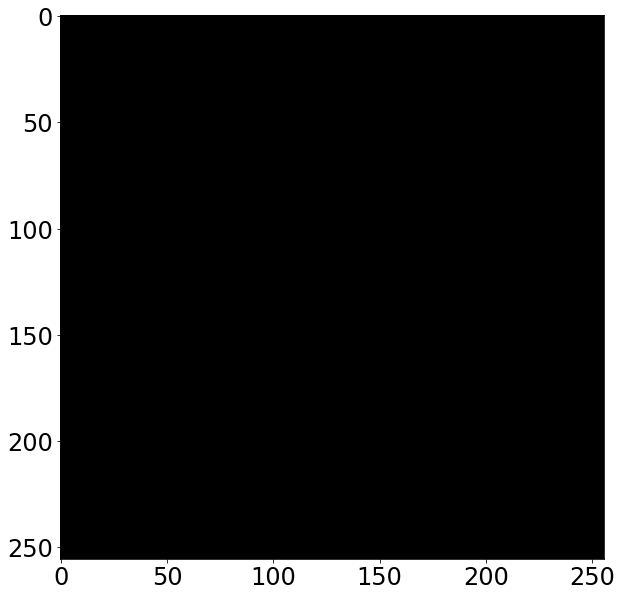

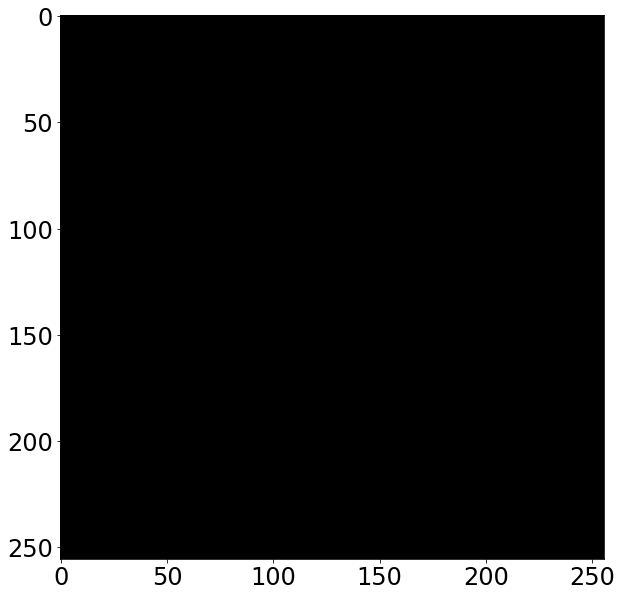

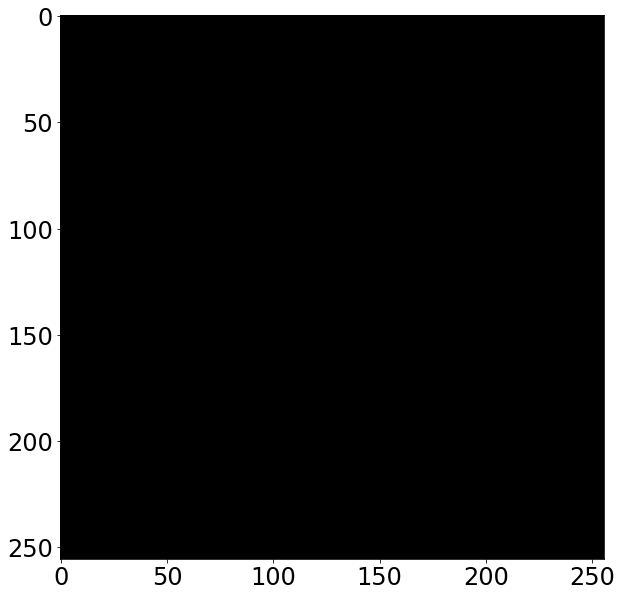

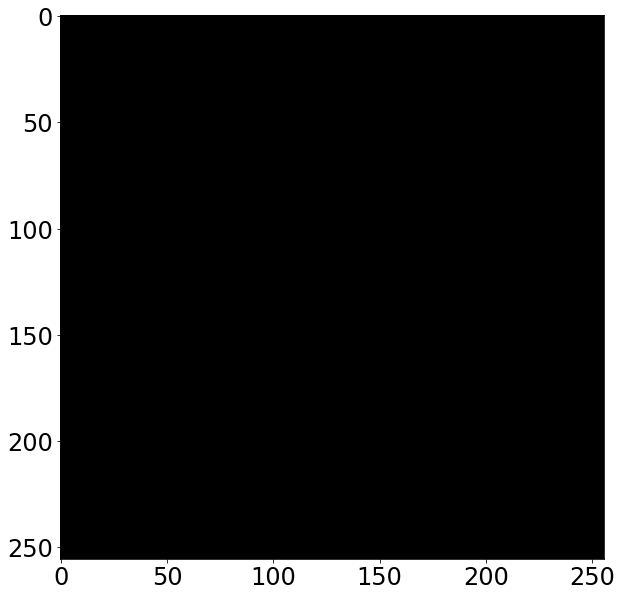

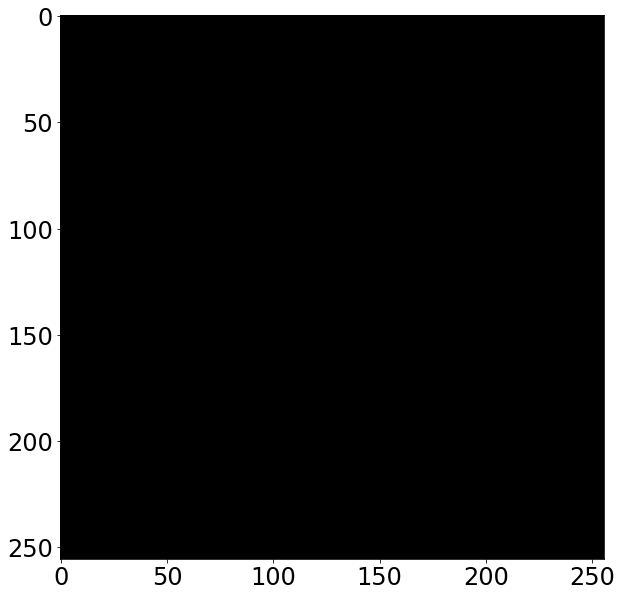

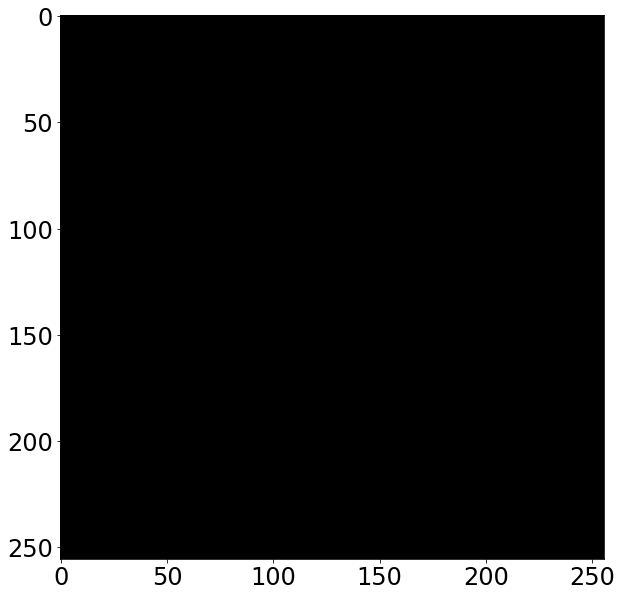

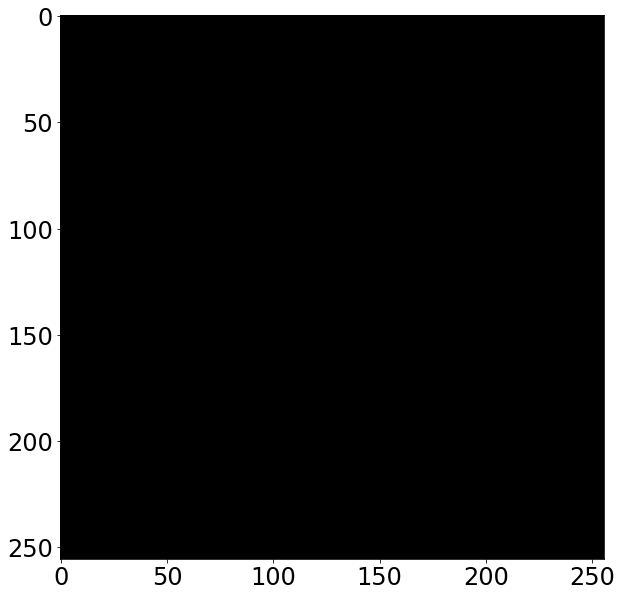

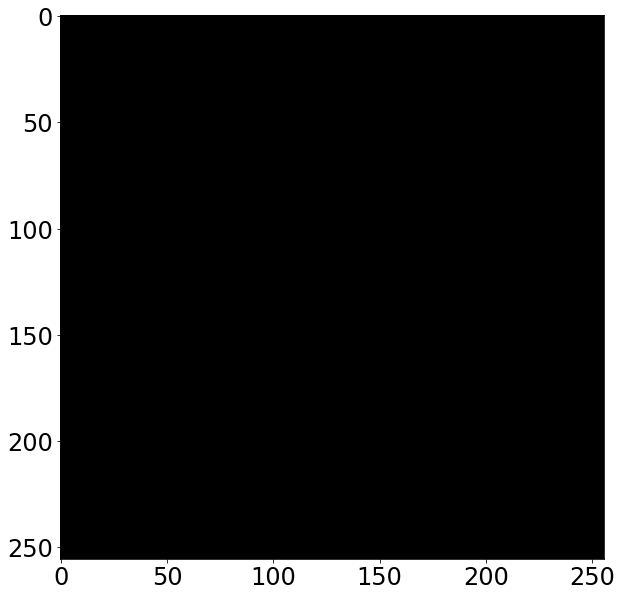

In [49]:
check_data_cleaning("sagittal", 0)

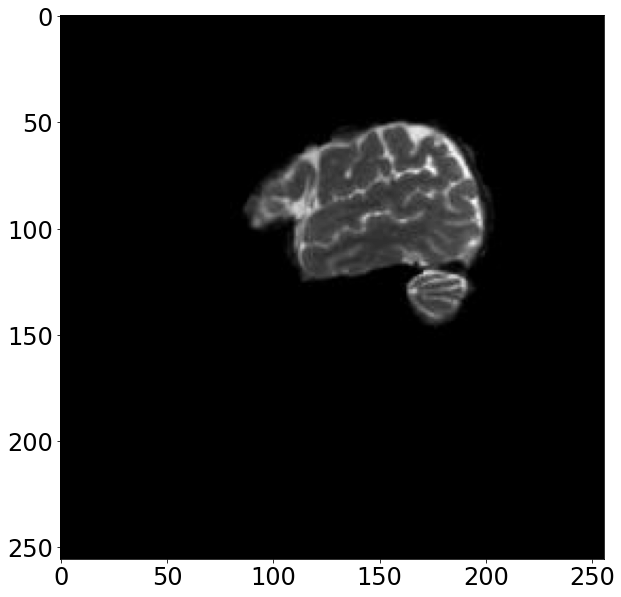

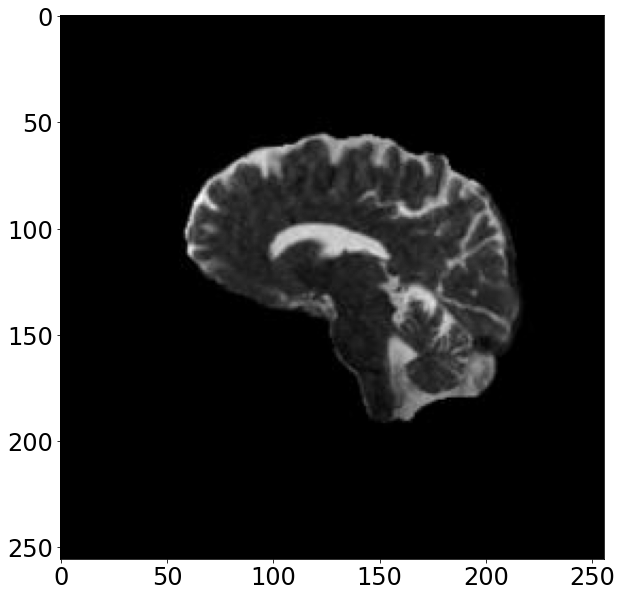

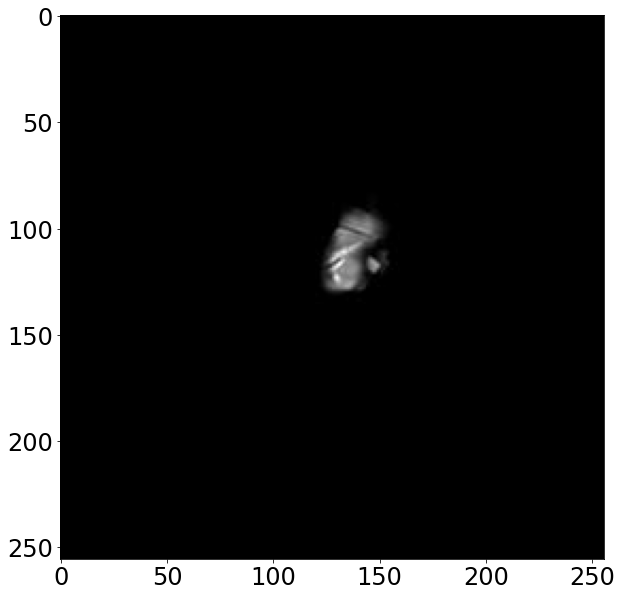

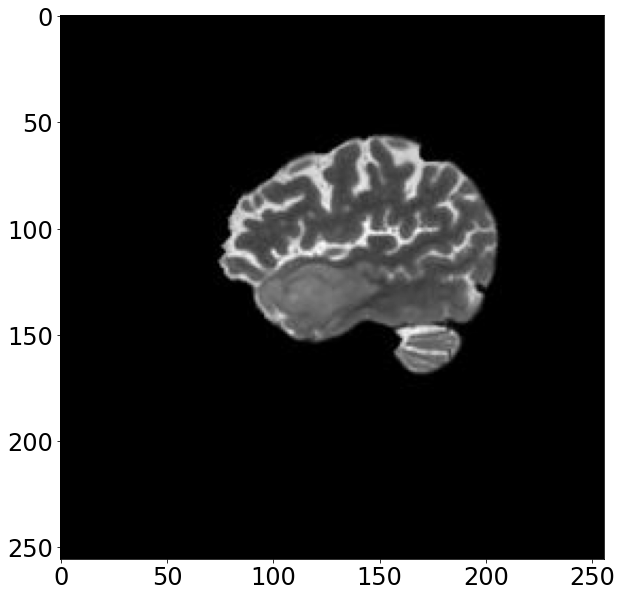

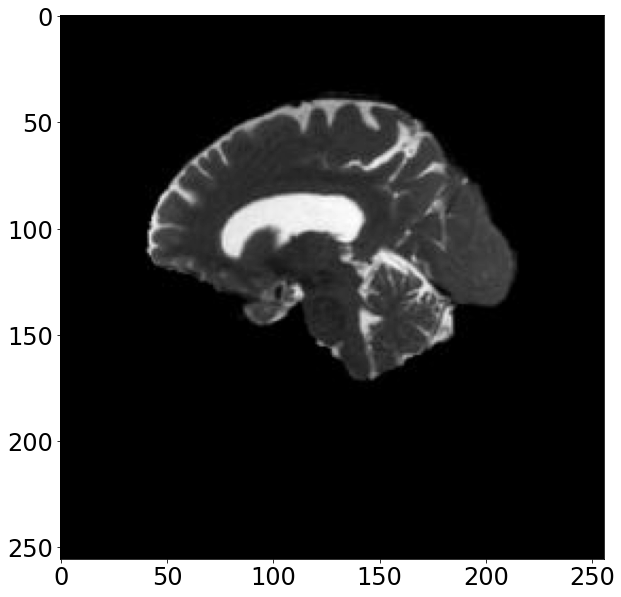

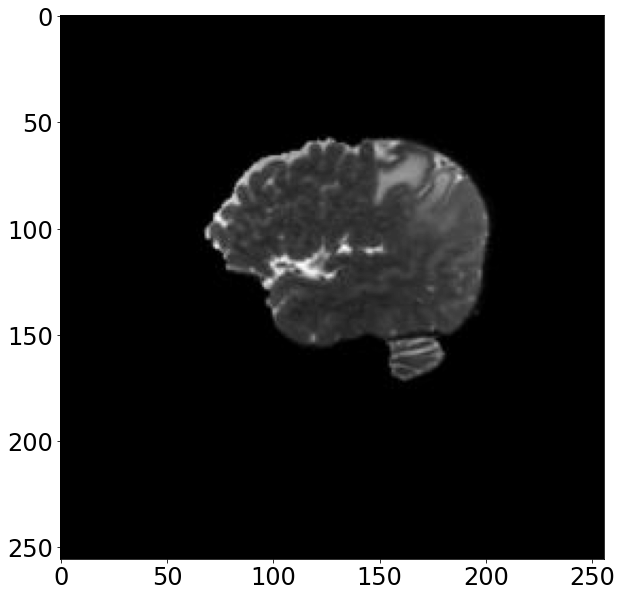

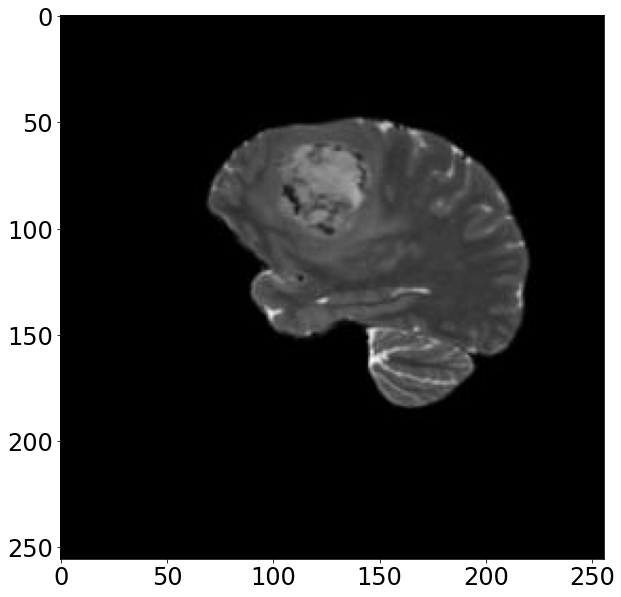

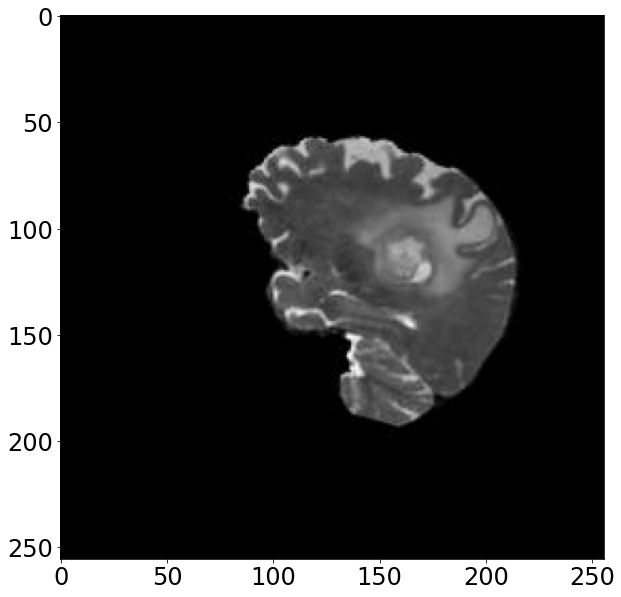

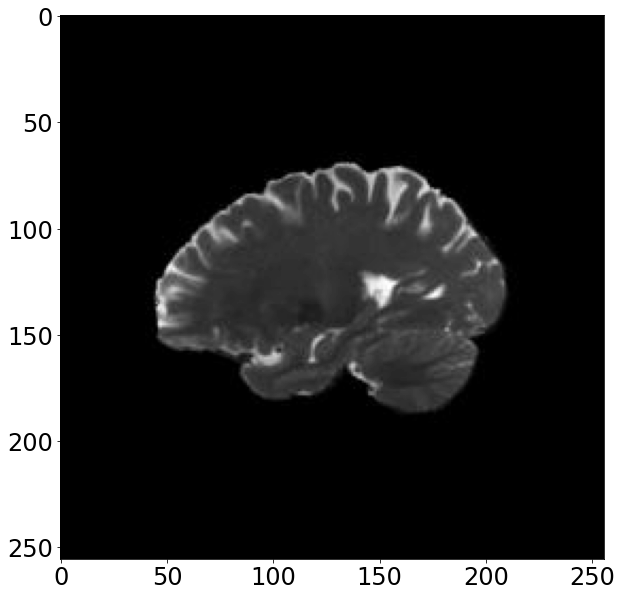

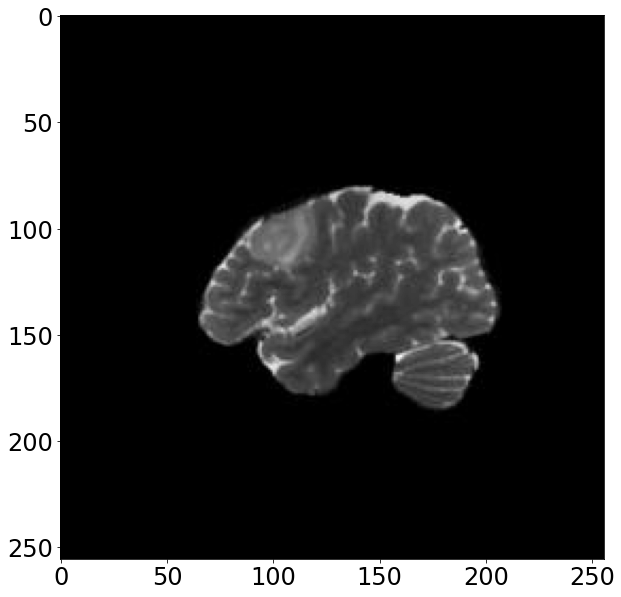

In [50]:
check_data_cleaning("sagittal", 1)

## Axial check

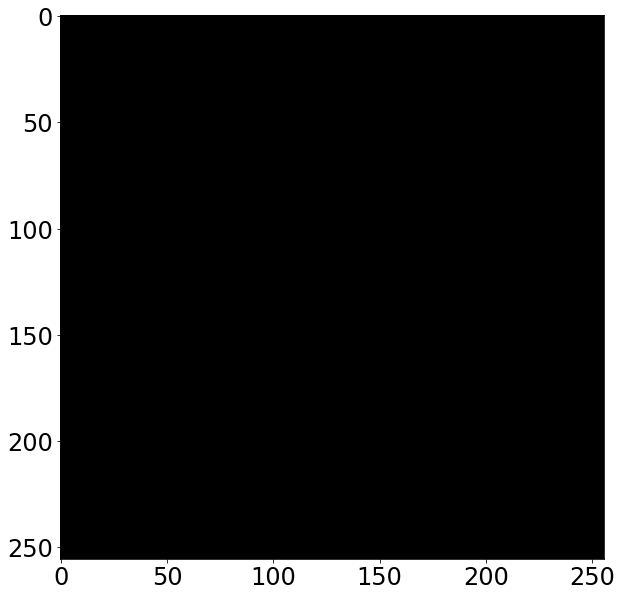

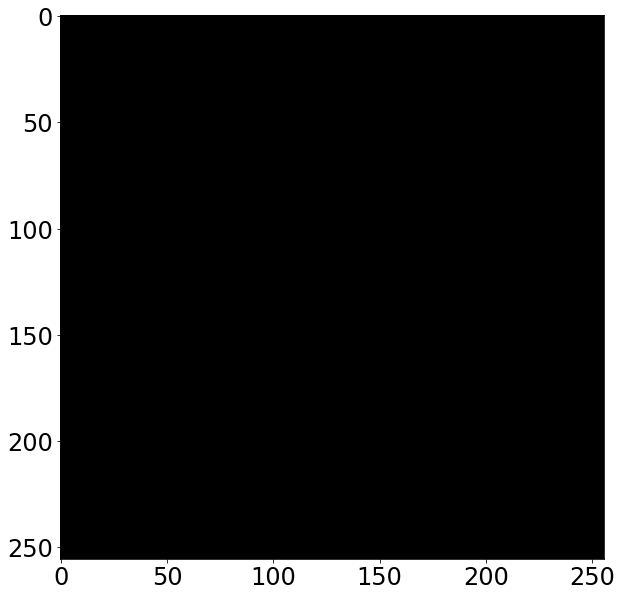

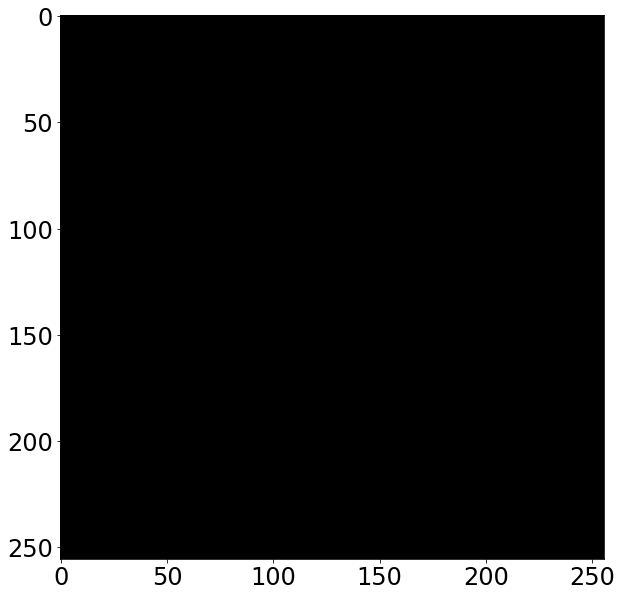

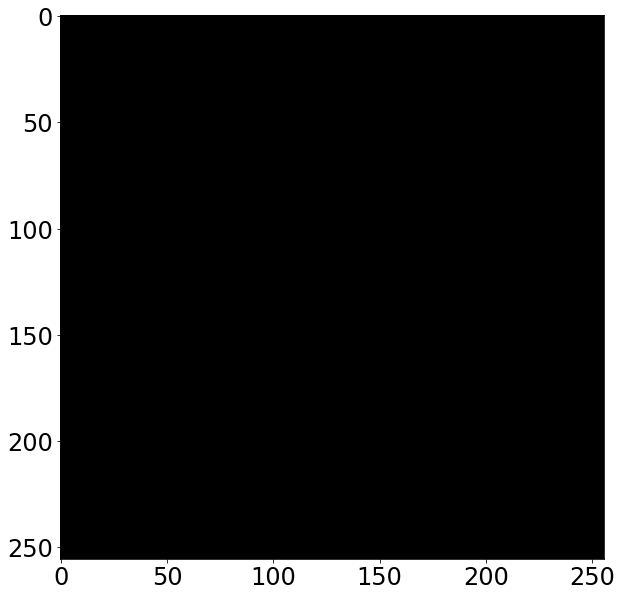

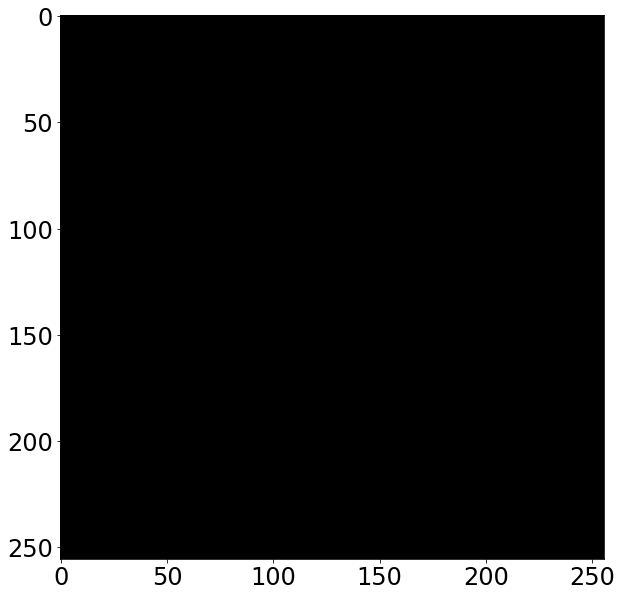

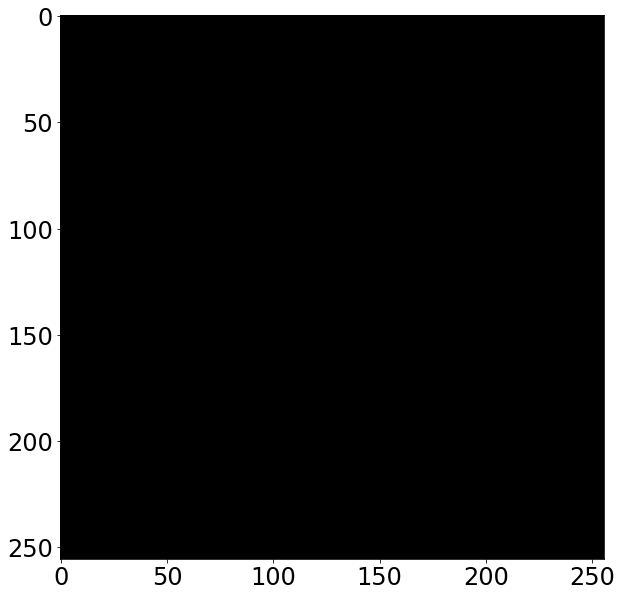

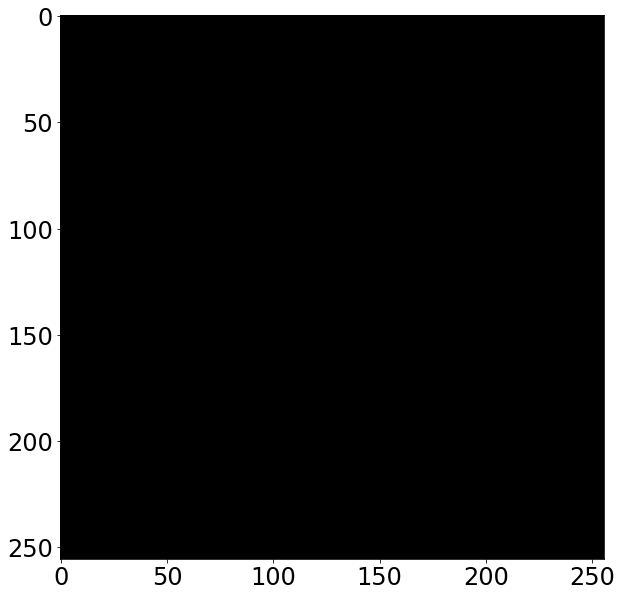

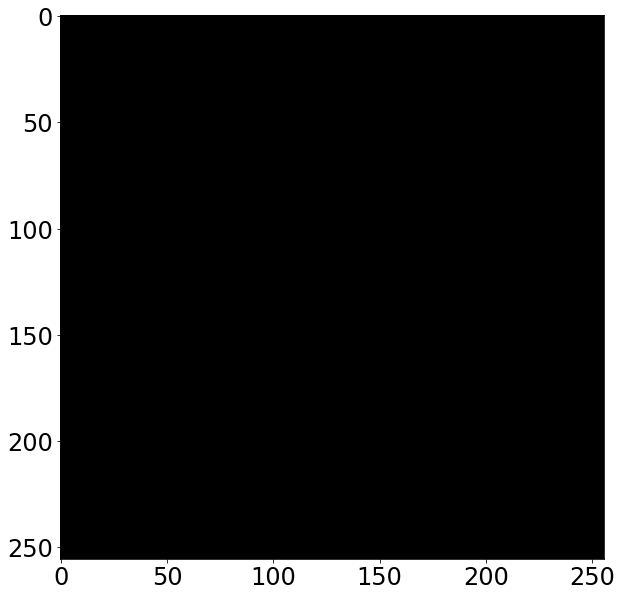

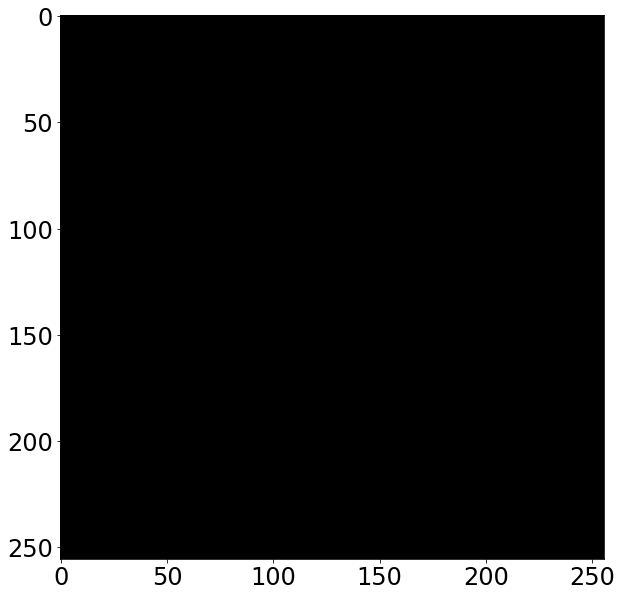

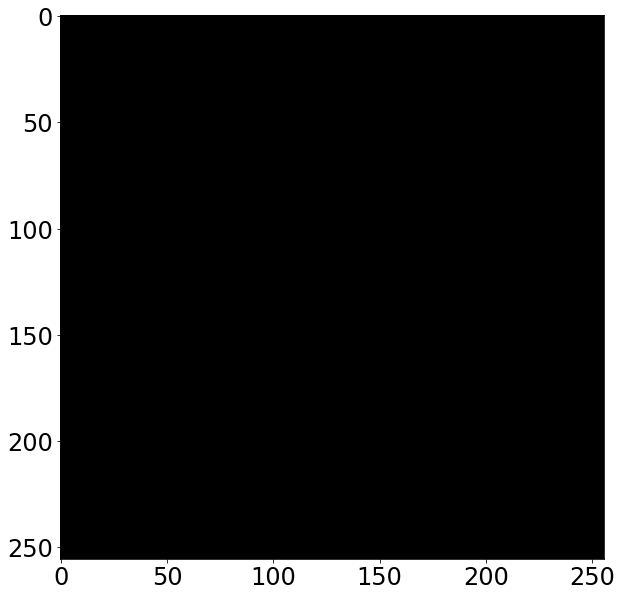

In [51]:
check_data_cleaning("axial", 0)

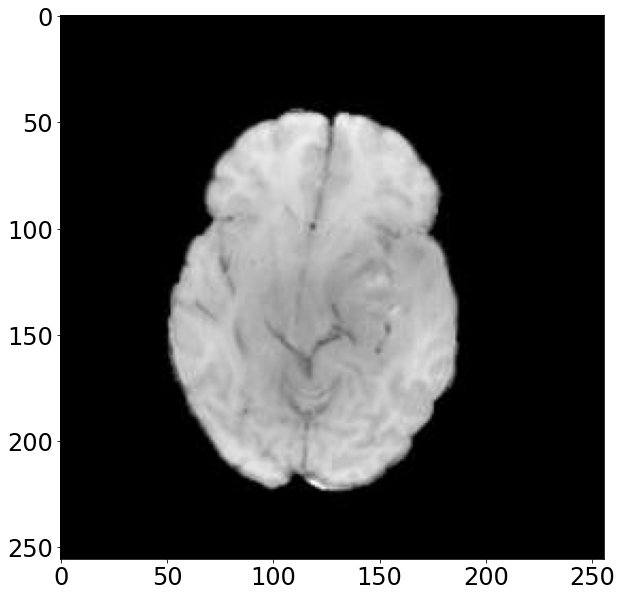

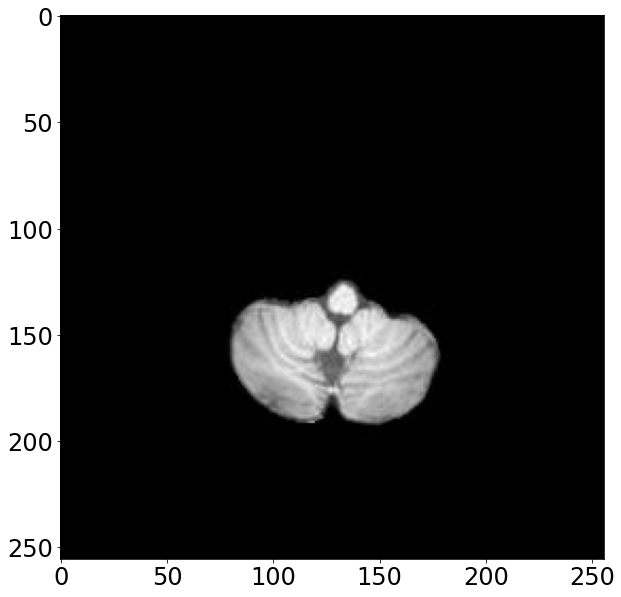

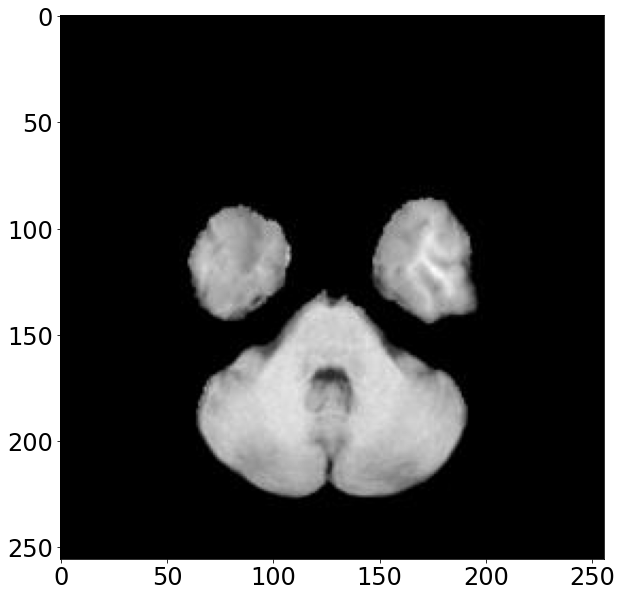

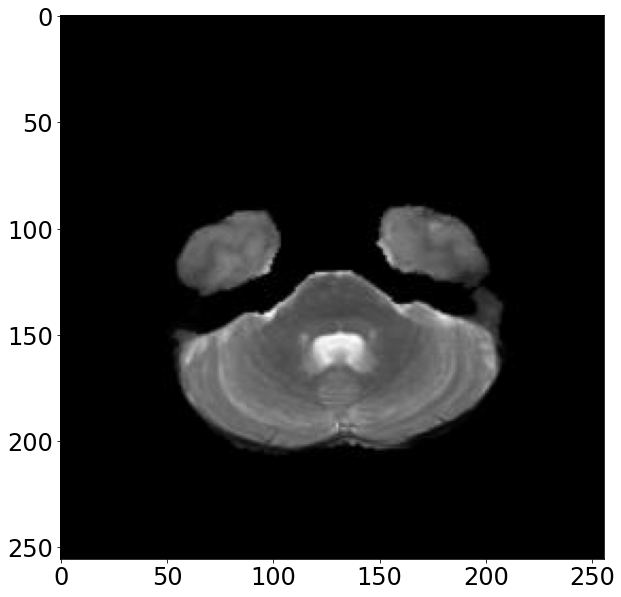

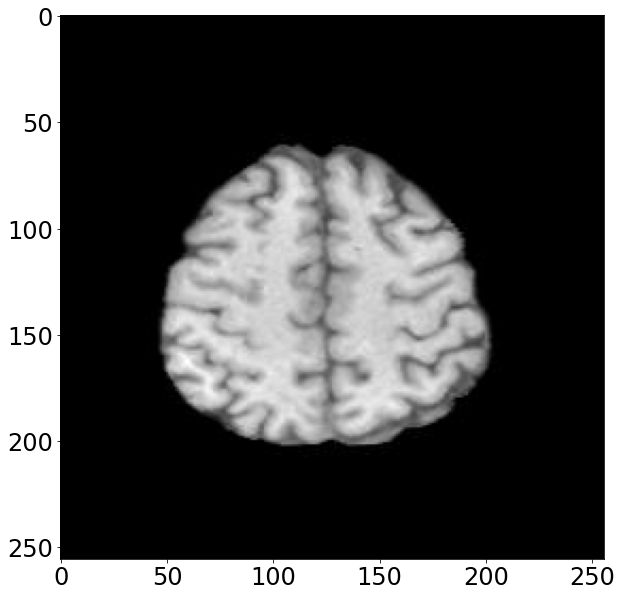

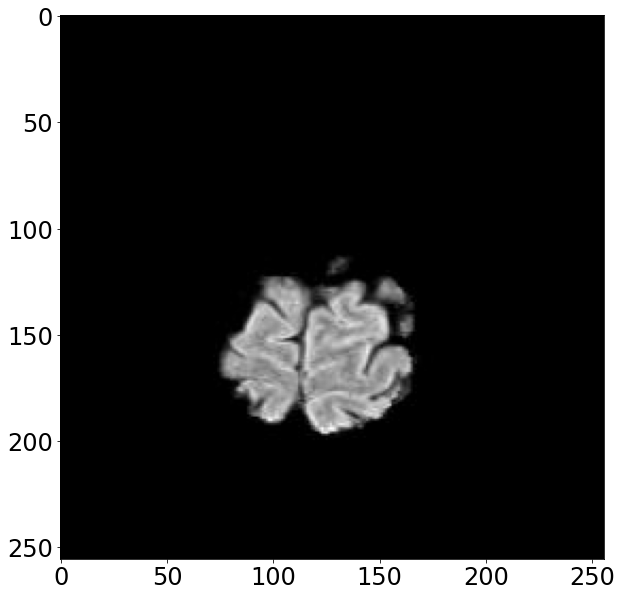

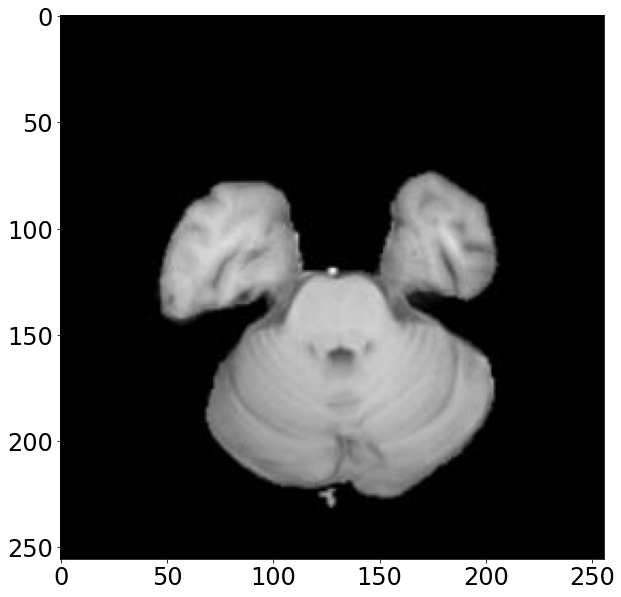

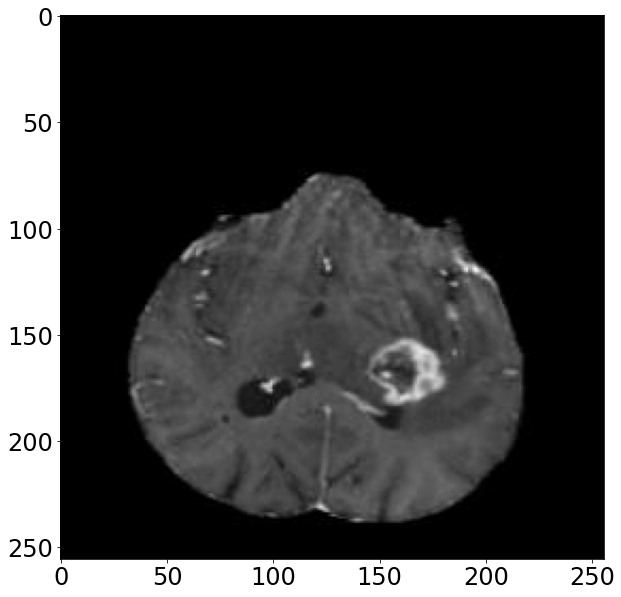

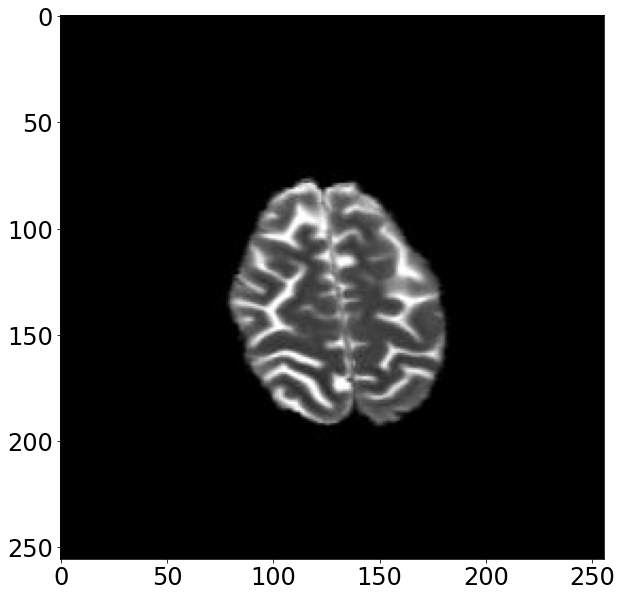

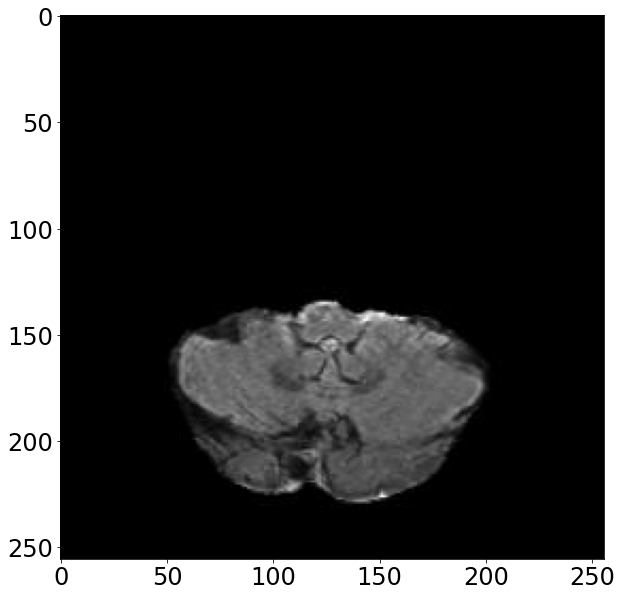

In [52]:
check_data_cleaning("axial", 1)

## Coronal check

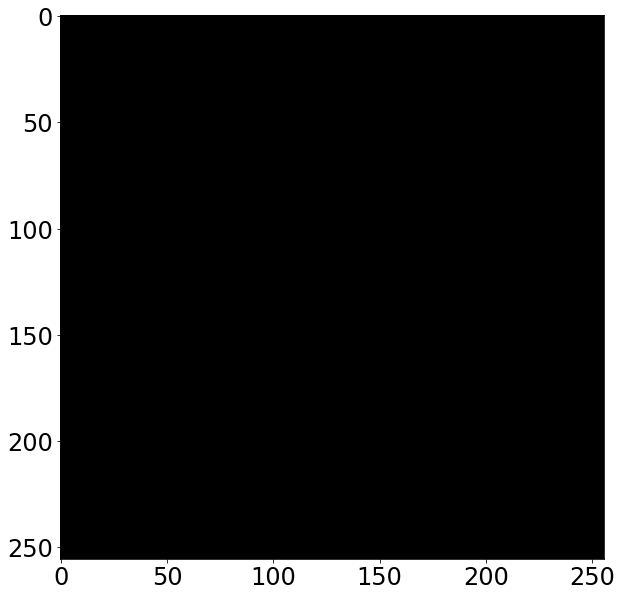

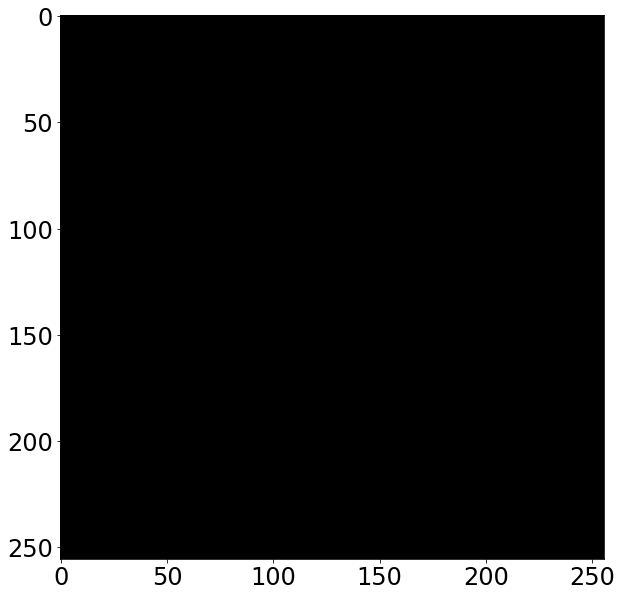

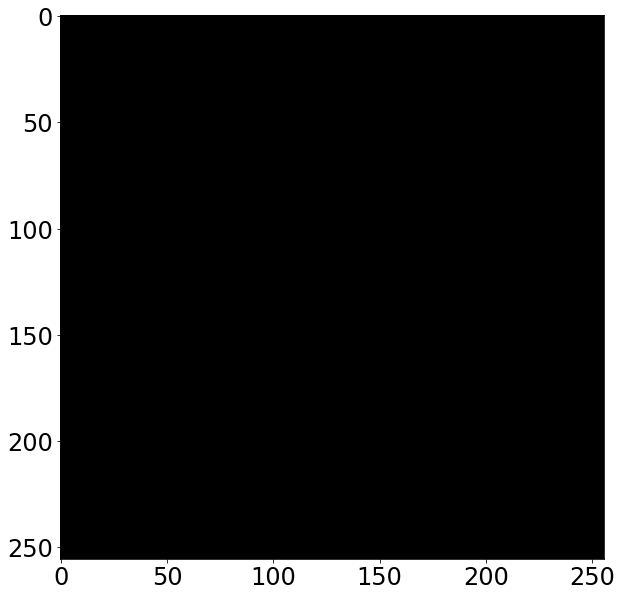

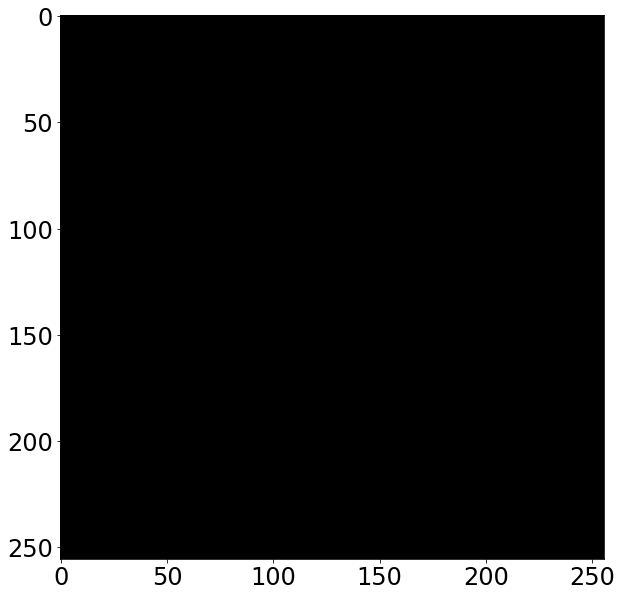

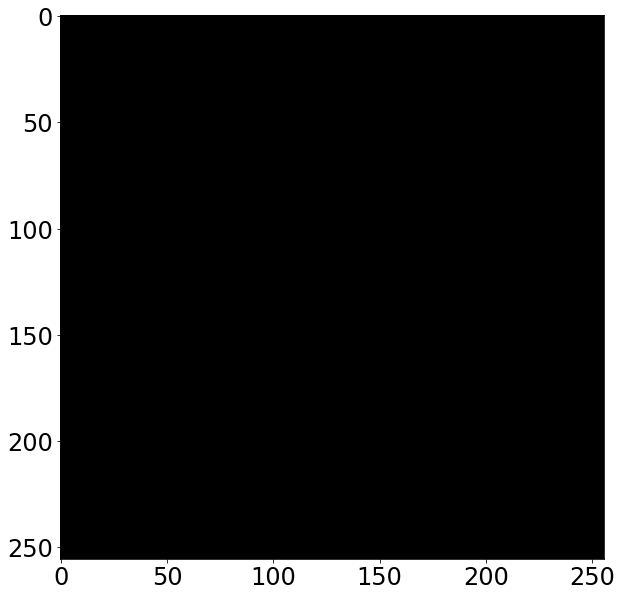

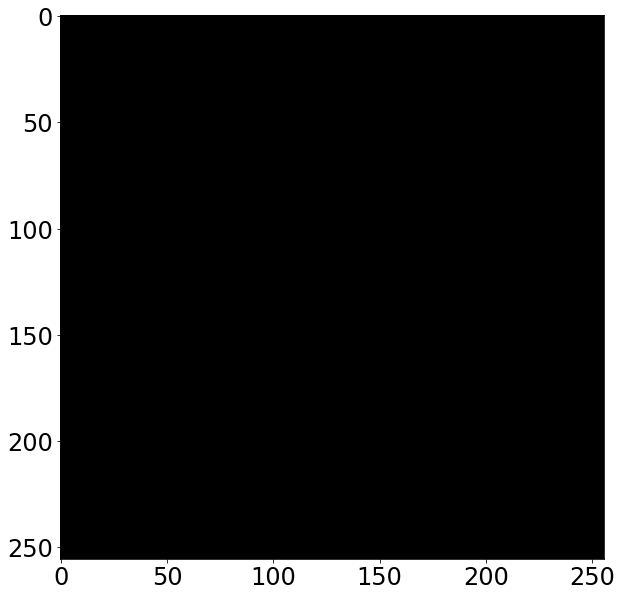

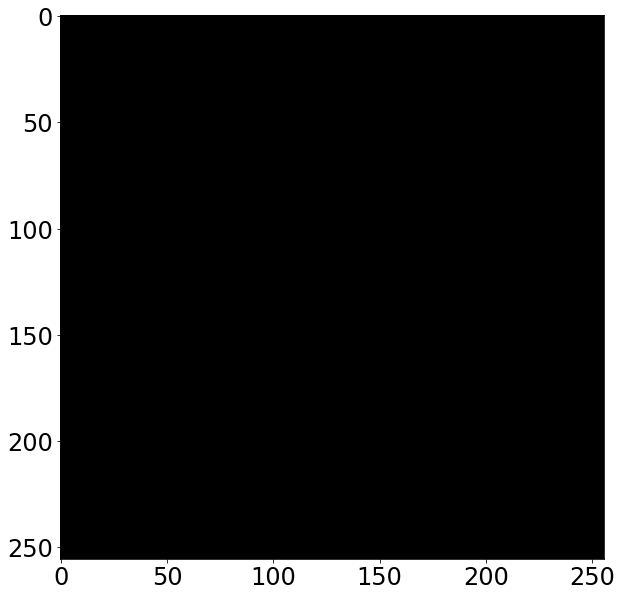

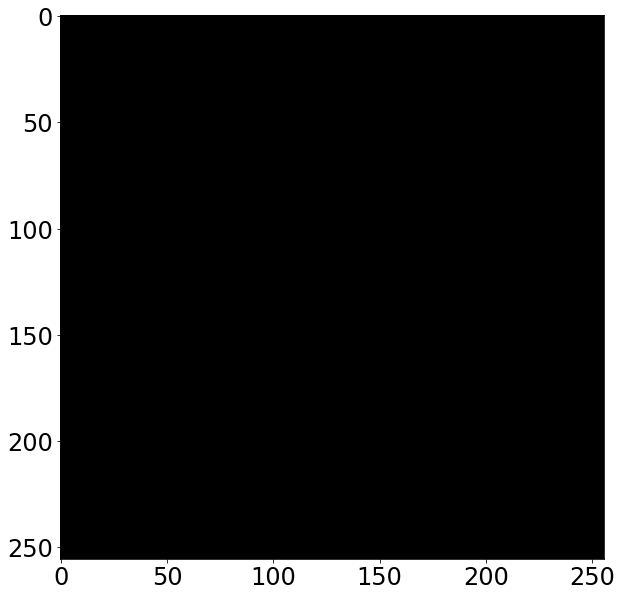

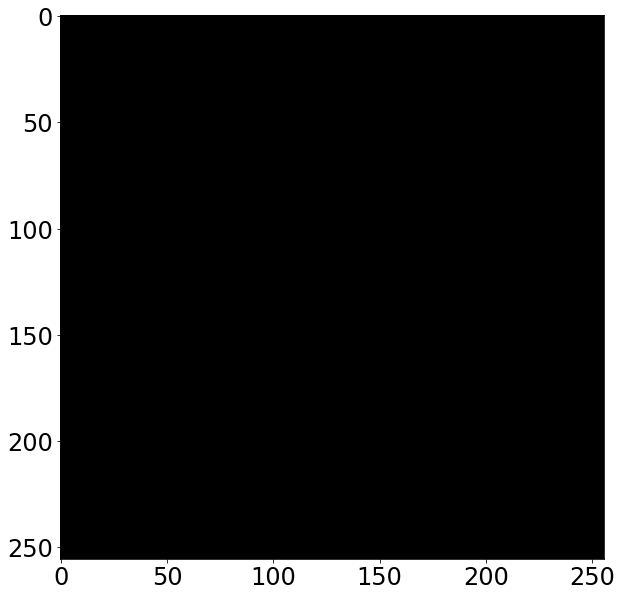

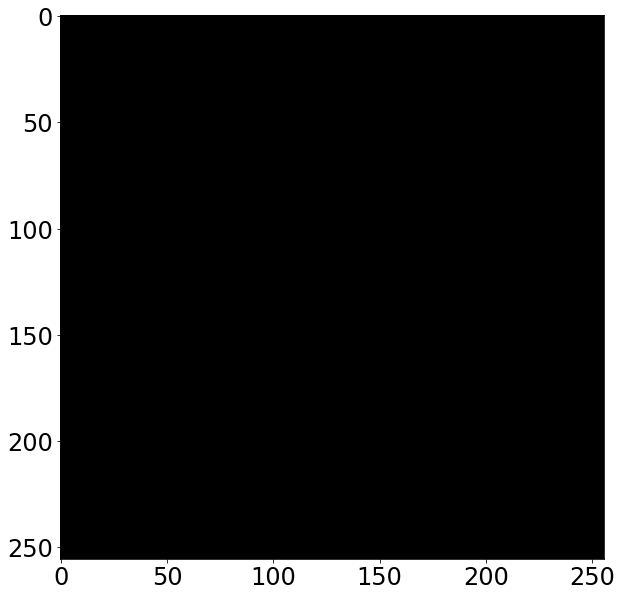

In [53]:
check_data_cleaning("coronal", 0)

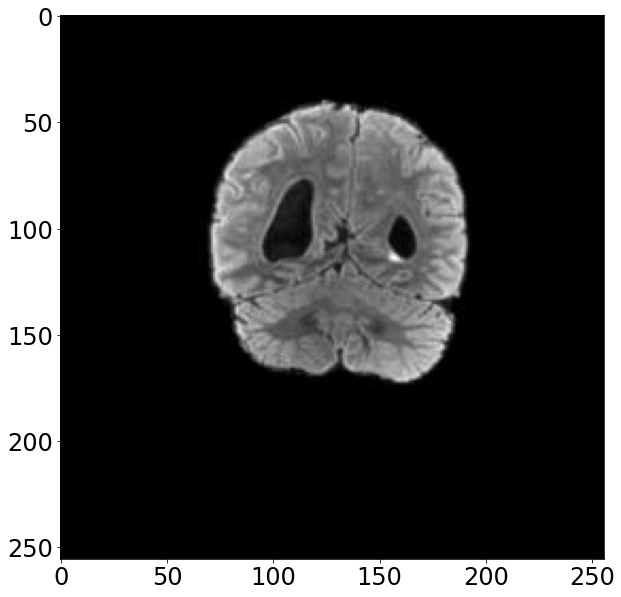

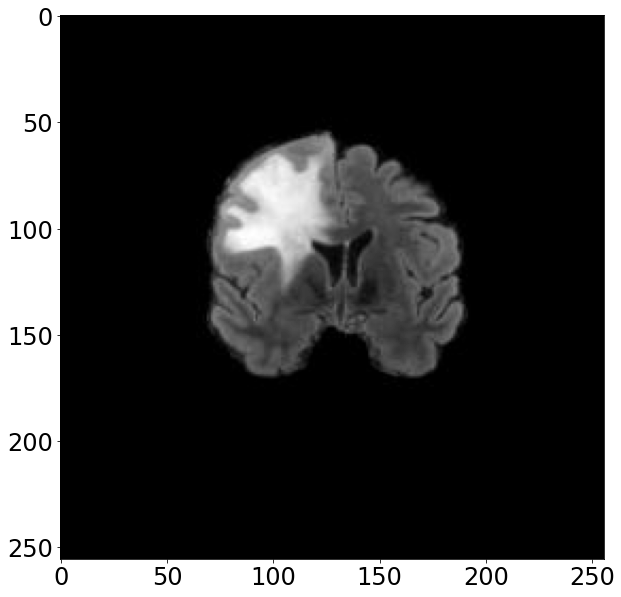

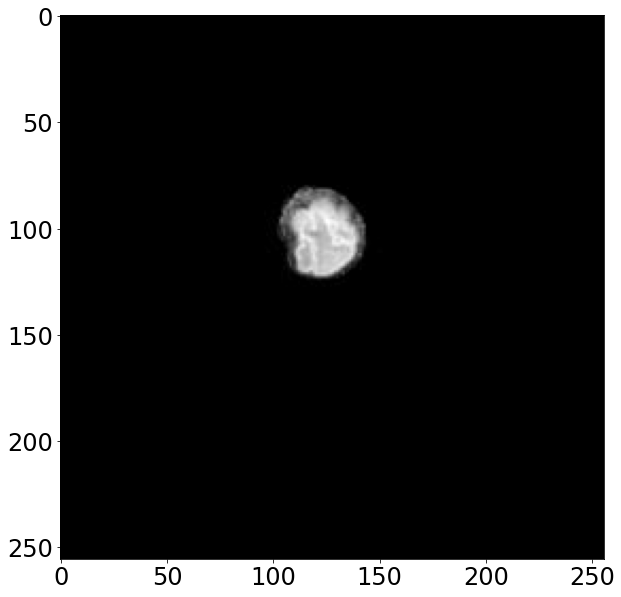

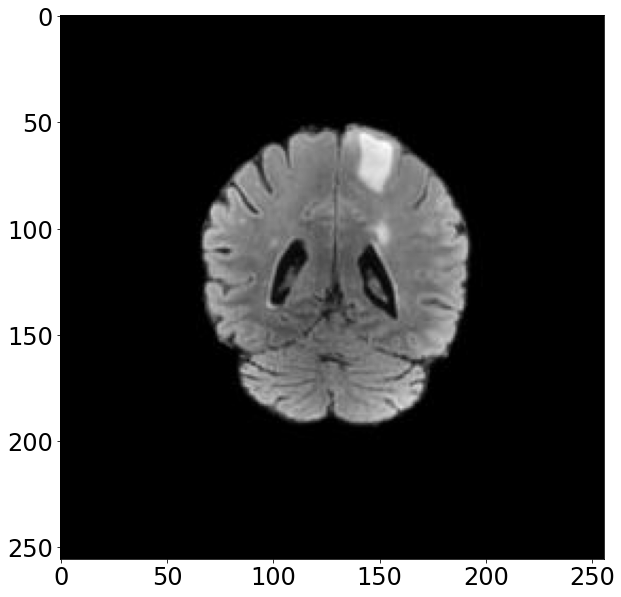

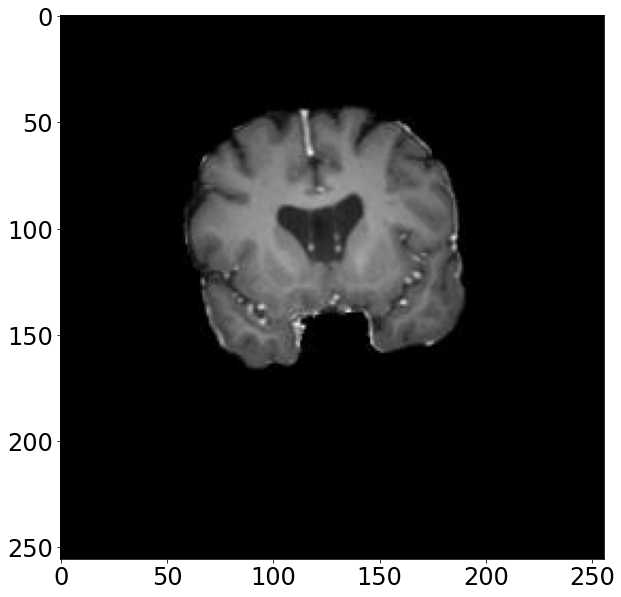

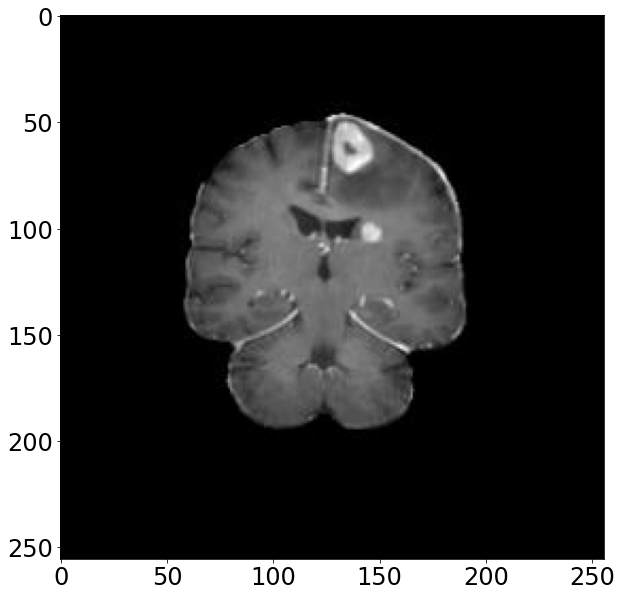

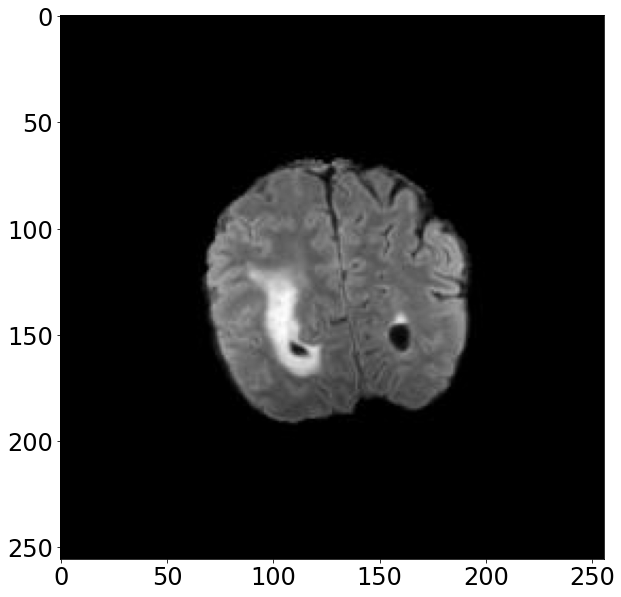

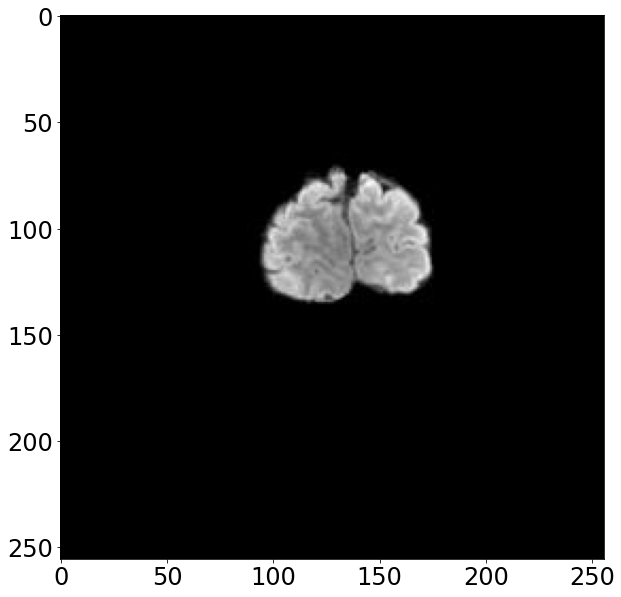

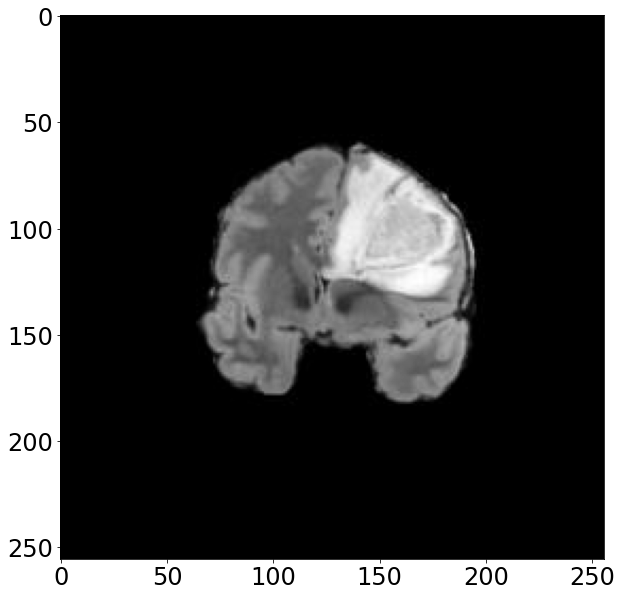

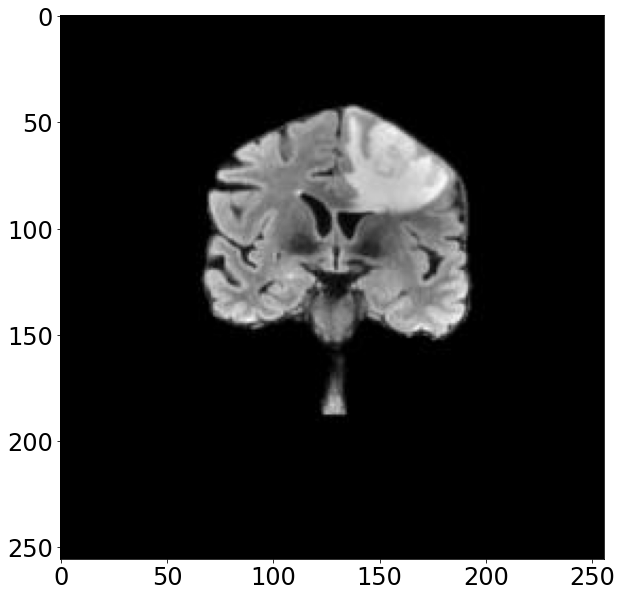

In [54]:
check_data_cleaning("coronal", 1)

# Save dataframe

In [56]:
df.to_csv("train_cleaned.csv")